# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# Annual Survey of School System Finances
`census.gov-school_finance-1.1.1` Last Update: 2022-07-16T18:35:47

__


## Documentation Links

* [Annual Survey of School System Finances Tables](https://www.census.gov/programs-surveys/school-finances/data/tables.html) Skip Navigation
Within Data

    Data Tools & Apps
    Errata Notes
    Tables

Annual Survey of School System Finances Tables
* [Documentation, 2020](https://www2.census.gov/programs-surveys/school-finances/technical-documentation/complete-technical-documentation/2020/school20doc.doc) Dataset documentation, including data dictionary

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [school_finance](data/school_finance.csv)**. Combined school finance

## References
<ul><li> <strong><a href="https://www2.census.gov/programs-surveys/school-finances/tables/2020/secondary-education-finance/elsec20.xls">sch_finance_20</a></strong>. All Data items, 2020</li><li> <strong><a href="https://www2.census.gov/programs-surveys/school-finances/tables/2019/secondary-education-finance/elsec19.xls">sch_finance_19</a></strong>. All Data items, 2019</li><li> <strong><a href="https://www2.census.gov/programs-surveys/school-finances/tables/2018/secondary-education-finance/elsec18.xls">sch_finance_18</a></strong>. All Data items, 2018</li><li> <strong><a href="https://www2.census.gov/programs-surveys/school-finances/tables/2017/secondary-education-finance/elsec17.xls">sch_finance_17</a></strong>. All Data items, 2017</li><ul>

In [3]:
resource_name='school_finance'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
state,integer,State Identification Number
idcensus,integer,School System Identification Number1
name,string,School System Name
conum,integer,ANSI State and County Code1
csa,string,Consolidated Statistical Area1
cbsa,string,Core-Based Statistical Area1
schlev,integer,School Level Code1
ncesid,integer,NCES ID Code1
yrdata,integer,Year of Data
v33,integer,Fall Membership


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,state,idcensus,name,conum,csa,cbsa,schlev,ncesid,yrdata,v33,...,ar5,ar6,ae1,ae2,ae3,ae4,ae5,ae6,c17,c16
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001.0,388,33860,3.0,100240.0,20,9120,...,0.0,174.0,818.0,182.0,620.0,0.0,10.0,0.0,NaN,NaN
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003.0,380,19300,3.0,100270.0,20,30602,...,0.0,3612.0,7682.0,5442.0,2076.0,0.0,5039.0,0.0,NaN,NaN
2,1,1500200200000,GULF SHORES CITY SCHOOL DISTRICT,1003.0,380,19300,3.0,100202.0,20,2221,...,0.0,370.0,557.0,36.0,510.0,0.0,344.0,0.0,NaN,NaN
3,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005.0,N,21640,3.0,100300.0,20,703,...,0.0,40.0,46.0,1.0,45.0,0.0,0.0,0.0,NaN,NaN
4,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005.0,N,21640,3.0,101410.0,20,5700,...,0.0,80.0,332.0,229.0,60.0,0.0,137.0,0.0,NaN,NaN


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,7
datetime,0
number,148
other,3


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,14135
j12,0.0,0.0
j11,0.0,0.0
j97,0.0,0.0
j98,0.0,0.0
ar3,0.0,NaN
ar4,0.0,NaN
ar5,0.0,NaN


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56918 entries, 0 to 56917
Columns: 148 entries, state to c16
dtypes: float64(19), int64(129)
memory usage: 64.3 MB


None

,count,mean,std,min,25%,50%,75%,max
state,56918.0,2.664855e+01,1.385268e+01,1.000000e+00,1.500000e+01,2.700000e+01,3.700000e+01,5.100000e+01
idcensus,56918.0,2.712753e+13,1.385311e+13,1.500100e+12,1.550286e+13,2.750224e+13,3.750700e+13,5.150230e+13
conum,56915.0,2.967720e+04,1.471062e+04,1.001000e+03,1.805500e+04,3.004300e+04,4.013900e+04,5.604500e+04
schlev,56914.0,2.898004e+00,1.270580e+00,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
ncesid,56875.0,2.973912e+06,1.470006e+06,1.000050e+05,1.802955e+06,3.011260e+06,4.031470e+06,5.606240e+06
...,...,...,...,...,...,...,...,...
ae4,14135.0,9.686381e+00,5.698666e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.696300e+04
ae5,14135.0,9.210187e+00,1.427108e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+03
ae6,14135.0,1.721967e+00,2.678490e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.314000e+03
c17,42783.0,6.719024e+00,8.098612e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.061000e+03


## Correlations

/Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


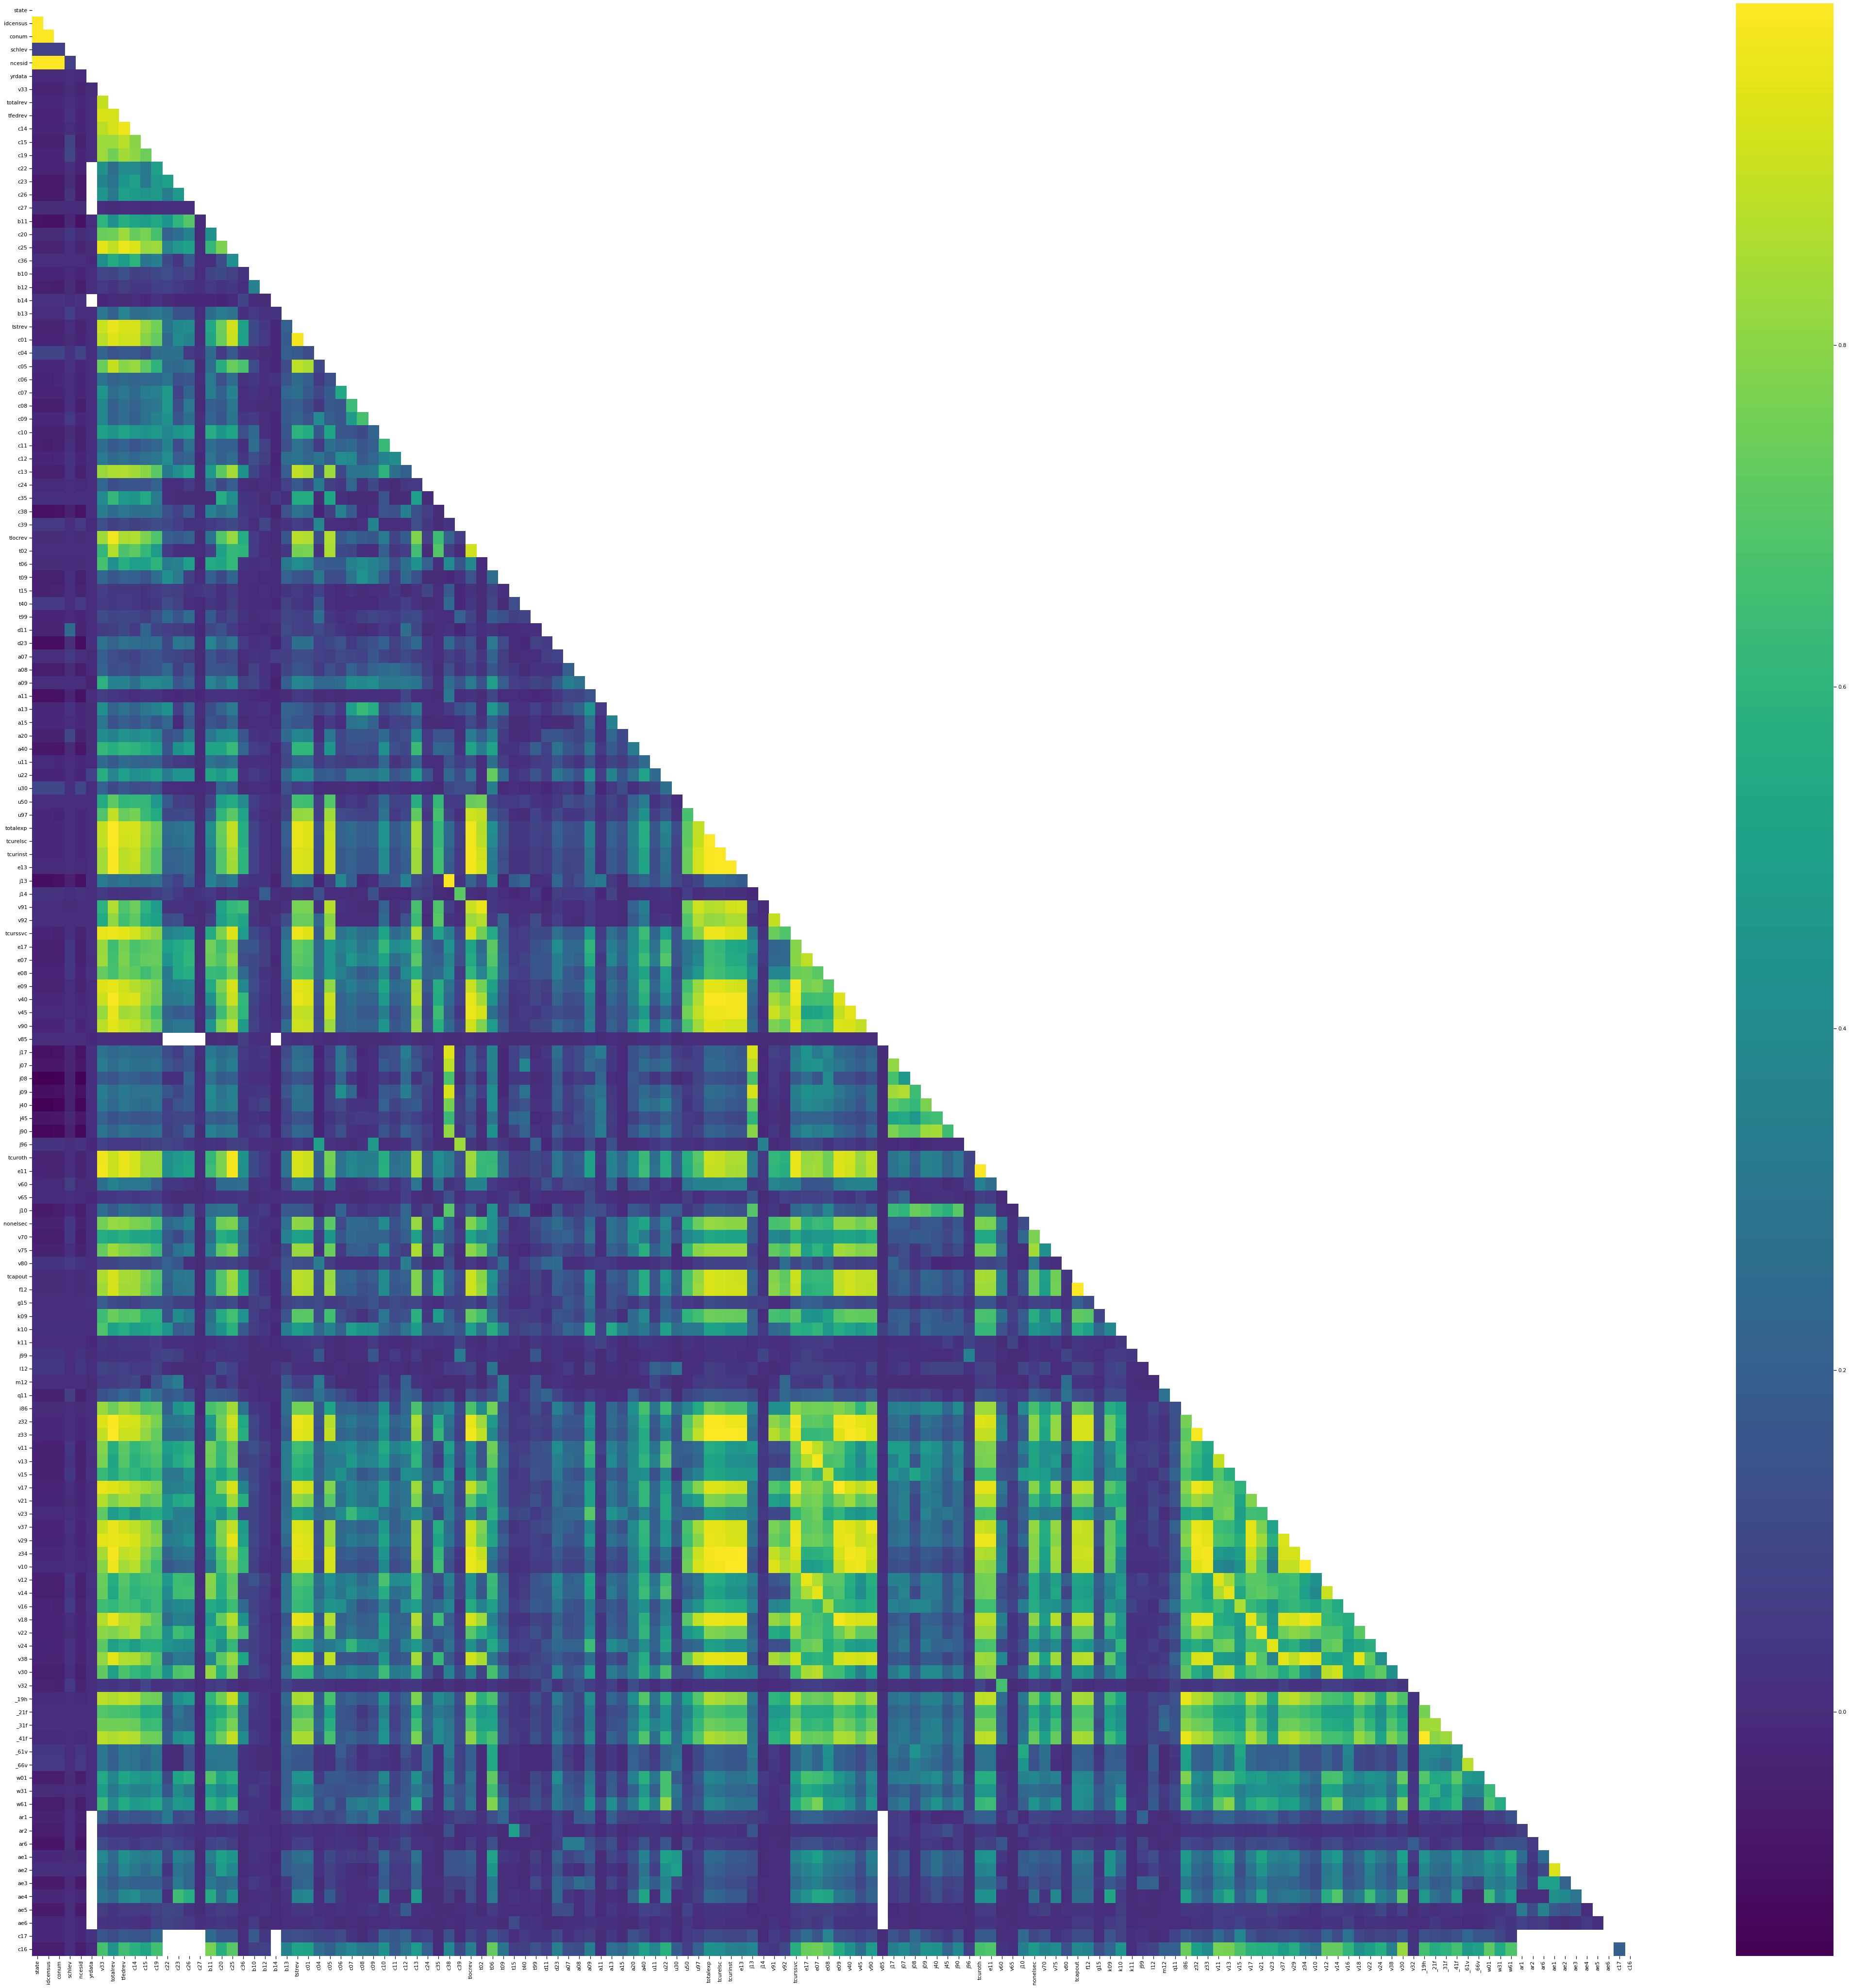

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56918 entries, 0 to 56917
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    56918 non-null  object
 1   csa     56918 non-null  object
 2   cbsa    56918 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


None

,count,unique,top,freq
name,56918,14525,LINCOLN CO SCH DIST,24
csa,56918,191,N,27010
cbsa,56918,947,N,14876


# Nulls


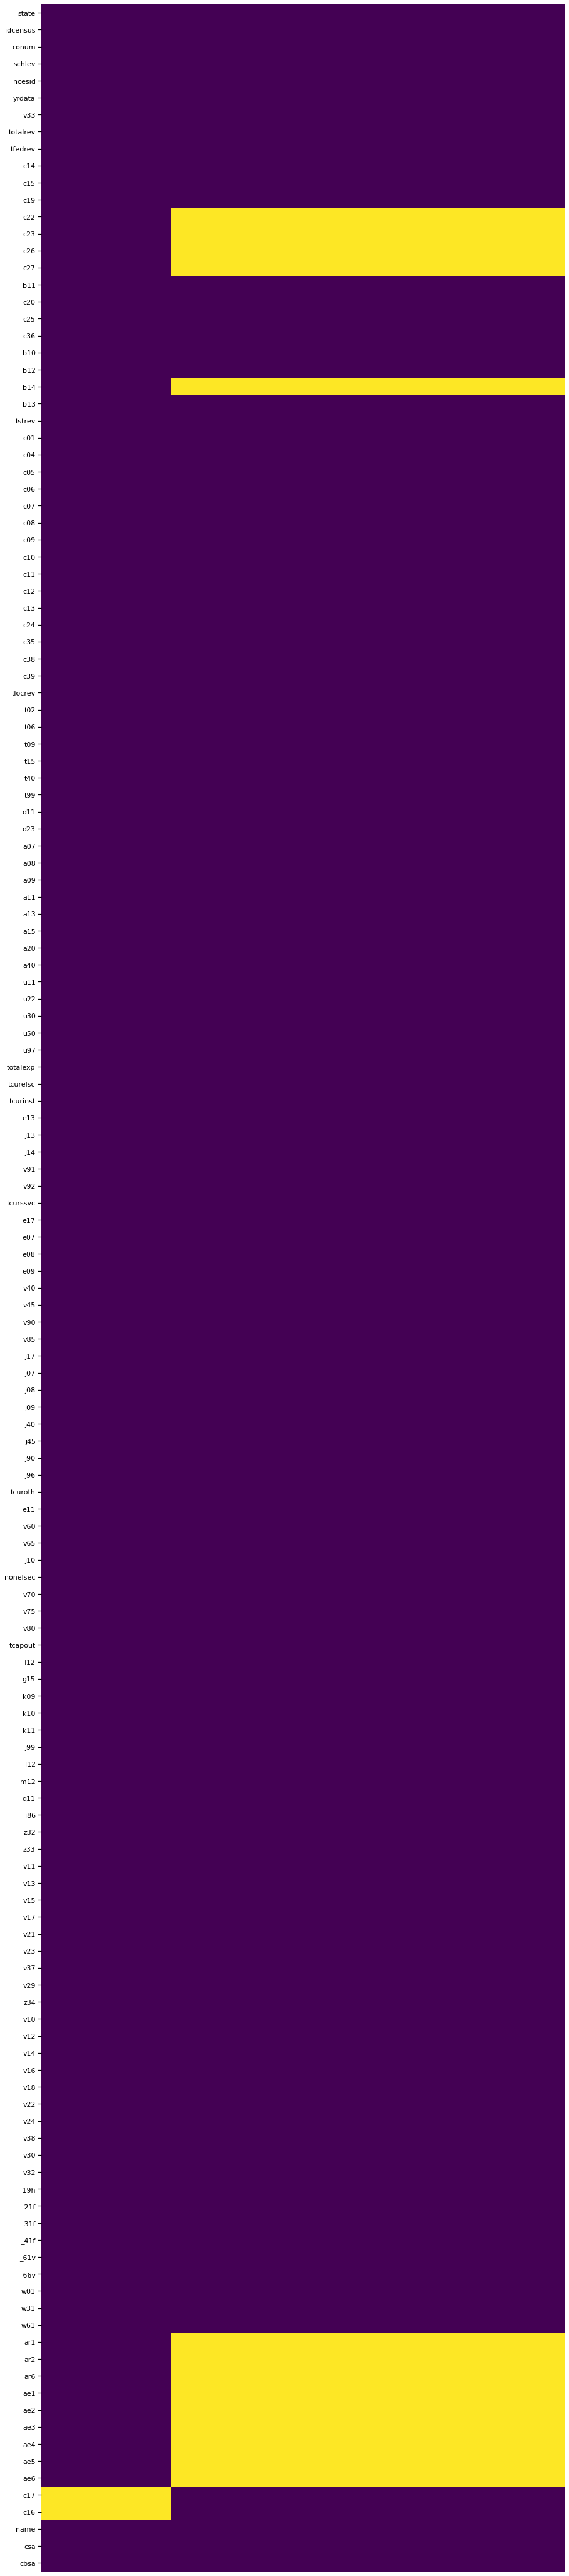

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )